# Bike Rental Prediction

Bike-sharing systems provide people with a cheap option for commuting to work or taking a ride on a pleasant day. The popularity of bike riding has been increasing over the years as the problem of traffic jams is getting worse for other mediums of commute. It is an environment-friendly medium of commute. Besides, it has many health benefits. Nowadays, many businesses are providing bike-sharing services to customers. They need to predict the demand for bike rentals on a day. In this project, our objective is to predict bike rental count on a day based on various environmental and seasonal features. We have a dataset with data from the years 2011 and 2012. We want to build a regression model that will predict the demand for bike rentals on a given day.

**Problem type: regression**

### Team Members
- Irfanul Hoque
- Manik Hossain

## Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('./dataset/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Features Description
| Feature Name | Description | Type |
|--------------|-------------|------|
| instant      | Index of the record |
| dteday | Date |
| season | Season (1: spring, 2: summer, 3: fall, 4: winter) | Categorical |
| yr | Year (0 represents 2011, 1 represents 2012) | Categorical |
| mnth | Month (1 to 12) | Categorical |
| holiday | Whether the day is holiday or not | Categorical |
| weekday | Day of the week | Categorical |
| workingday | If the day is neither weekend nor holiday then it is 1, otherwise it is 0. | Categorical
| weathersit | Weather condition | Categorical |
| | 1. Clear, Few clouds, Partly cloudy, Partly cloudy. 
| | 2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist. 
| | 3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. 
| | 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp | Normalized temperature in Celsius. | Numeric |
| atemp | Normalized feeling temperature in Celsius. | Numeric |
| hum | Normalized humidity. The values are divided by 100 (max) | Numeric |
| windspeed | Normalized wind speed. The values are divided to by (max) | Numeric |
| casual | count of casual users | Numeric |
| registered | count of registered users | Numeric |
| count | count of total rent bikes including both casual and registered | Numeric |

## Data Preparation

In [2]:
df.drop('instant', axis=1, inplace=True)
df.rename(columns = {'cnt': 'count'}, inplace=True)
df['yr'] = pd.Categorical(df['yr'])
df['mnth'] = pd.Categorical(df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}))
df['holiday'] = pd.Categorical(df['holiday'])
df['weekday'] = pd.Categorical(df['weekday'].map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}))
df['workingday'] = pd.Categorical(df['workingday'])
df['weathersit'] = pd.Categorical(df['weathersit'].map({1: 'Clear', 2: 'Misty', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'}))
df['season'] = pd.Categorical(df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}))
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(3)
memory usage: 52.2

In [3]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,0,Jan,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis

In [4]:
print('Number of mismatch:', end=' ')
print(sum(df['casual'] + df['registered'] != df['count']))

Number of mismatch: 0


There is no mismatch between total bike rental counts and the sum of different types of rental counts.

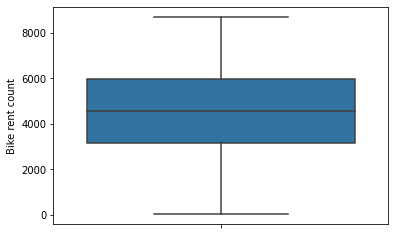

In [5]:
sns.boxplot(y='count', data=df)
plt.ylabel('Bike rent count')
plt.show()

In [6]:
df.describe()

,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


There is no outlier for the `count` variable in the dataset.

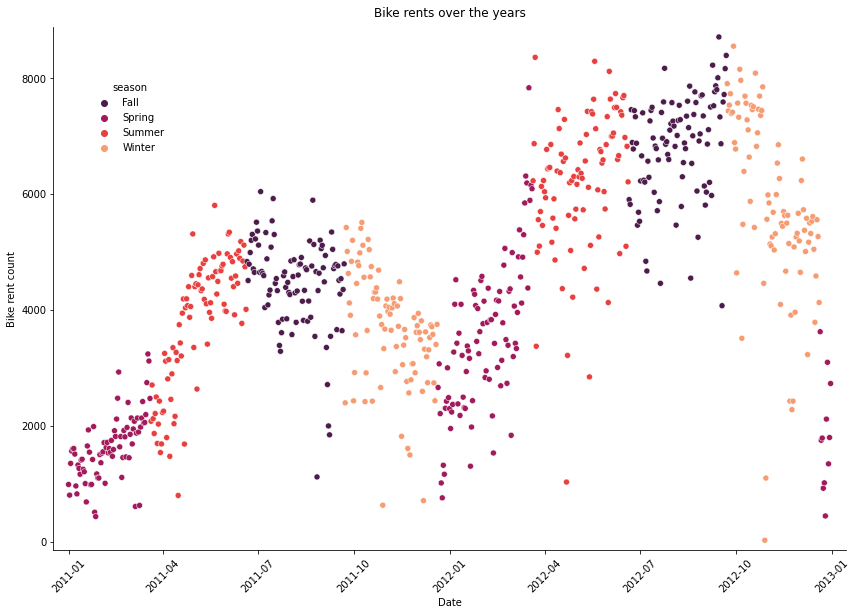

In [7]:
g = sns.relplot(
    data = df, x = 'dteday', y = 'count',
    hue='season', legend='brief', 
    alpha=1, height=8, aspect=1.5,
    palette='rocket'
)

plt.xticks(rotation=45)
plt.margins(0.02)
sns.move_legend(g, 'upper left', bbox_to_anchor=(0.1, 0.9))
plt.xlabel('Date')
plt.ylabel('Bike rent count')
plt.title('Bike rents over the years', pad=10)
plt.show()

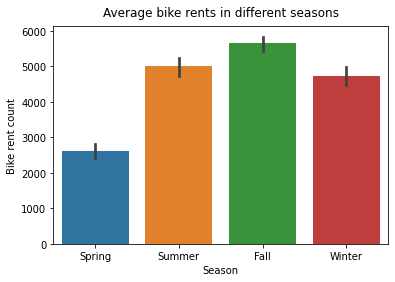

In [8]:
sns.barplot(
    data=df, x='season', y='count', 
    estimator=np.mean, palette='tab10',
    order=['Spring', 'Summer', 'Fall', 'Winter']
)
plt.ylabel('Bike rent count')
plt.xlabel("Season")
plt.title('Average bike rents in different seasons', pad=10)
plt.show()

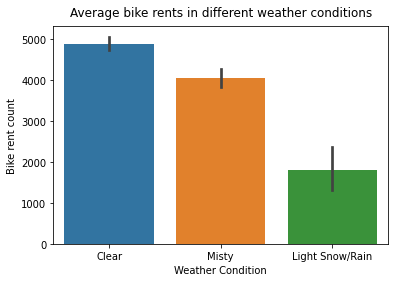

In [9]:
sns.barplot(
    data=df, x='weathersit', y='count', 
    estimator=np.mean, palette='tab10',
    order=['Clear', 'Misty', 'Light Snow/Rain']
)
plt.ylabel('Bike rent count')
plt.xlabel("Weather Condition")
plt.title('Average bike rents in different weather conditions', pad=10)
plt.show()

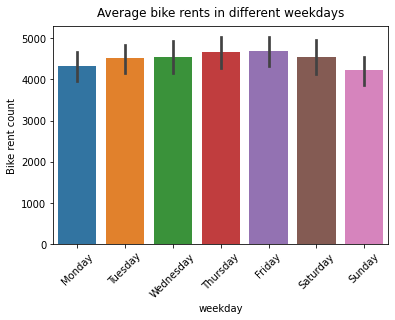

In [10]:
sns.barplot(
    data=df, x='weekday', y='count', 
    estimator=np.mean, palette='tab10',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.xticks(rotation=45)
plt.ylabel('Bike rent count')
plt.title('Average bike rents in different weekdays', pad=10)
plt.show()

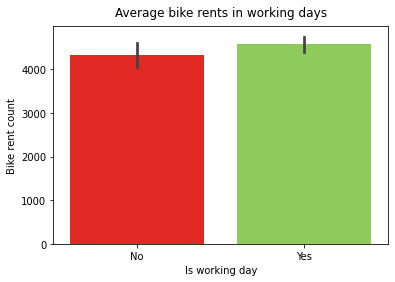

In [11]:
RdGn = sns.color_palette(["#FF0B04", "#8cdd49"])
sns.barplot(data=df, x='workingday', y='count', estimator=np.mean, palette=RdGn)
plt.ylabel('Bike rent count')
plt.xlabel("Is working day")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Average bike rents in working days', pad=10)
plt.show()

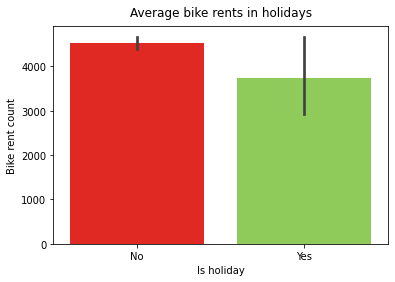

In [12]:
RdGn = sns.color_palette(["#FF0B04", "#8cdd49"])
sns.barplot(data=df, x='holiday', y='count', estimator=np.mean, palette=RdGn)
plt.ylabel('Bike rent count')
plt.xlabel("Is holiday")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Average bike rents in holidays', pad=10)
plt.show()

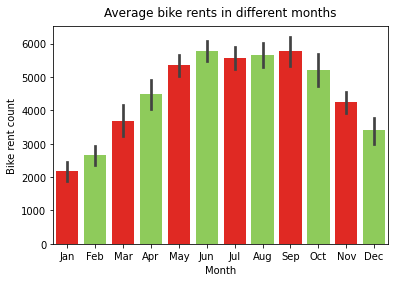

In [13]:
RdGn = sns.color_palette(["#FF0B04", "#8cdd49"])
sns.barplot(
    data=df, x='mnth', y='count', 
    order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    estimator=np.mean, palette=RdGn
)
plt.ylabel('Bike rent count')
plt.xlabel("Month")
plt.title('Average bike rents in different months', pad=10)
plt.show()

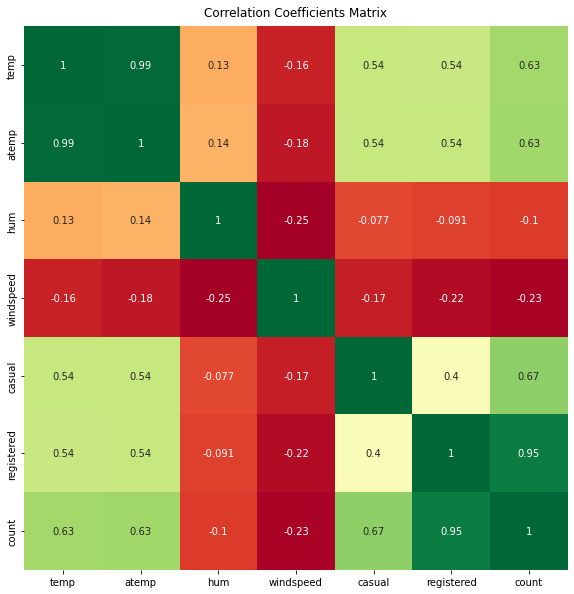

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, annot=True, cbar=False, cmap='RdYlGn')
plt.title('Correlation Coefficients Matrix', pad=10)
plt.show()

We can drop either `temp` or `atemp` as these two variables are strongly correlated and they provide similar information. So keeping only one them is enough.

# Model Building

## Dataset Split

In [15]:
data = df.drop(['dteday', 'temp', 'casual', 'registered'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   yr          731 non-null    category
 2   mnth        731 non-null    category
 3   holiday     731 non-null    category
 4   weekday     731 non-null    category
 5   workingday  731 non-null    category
 6   weathersit  731 non-null    category
 7   atemp       731 non-null    float64 
 8   hum         731 non-null    float64 
 9   windspeed   731 non-null    float64 
 10  count       731 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.4 KB


In [16]:
from sklearn.model_selection import train_test_split

X = data.drop('count', axis=1)
y = data['count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    shuffle=False  # cannot shuffle timeseries data 
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.11,
    shuffle=False
)

X_train.shape, X_val.shape, X_test.shape

((584, 10), (73, 10), (74, 10))

## Preprocessing Pipeline

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = [cname for cname in X_train.columns if X_train[cname].dtype == 'category']
categorical_transformer = make_pipeline(OneHotEncoder(drop='first', handle_unknown='ignore'))

numeric_features = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
numeric_transformer = make_pipeline(StandardScaler())

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

## Linear Regression without reguralization (Baseline Model)

In [18]:
baseline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("model", LinearRegression())
    ])

In [19]:
baseline.fit(X_train, y_train)
print(f"R-squared value on training data: {baseline.score(X_train, y_train):0.4f}")
print(f"R-squared value on validation data: {baseline.score(X_val, y_val):0.4f}")

R-squared value on training data: 0.8557
R-squared value on validation data: 0.1826


The $r^2$ value on the training data is $0.8557$, which means $85.57\%$ of the variation in the dependent variable can be explained by the features. On the other hand, the $r^2$ value on the validation dataset is $0.1826$, which means $18.26\%$ of the variation in the dependent variable can be explained by the features. As we can see, our baseline model has a quite high variance.

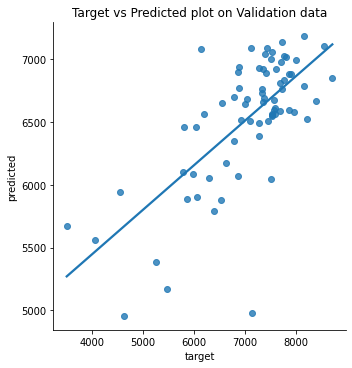

In [20]:
y_pred = baseline.predict(X_val)
prediction = pd.DataFrame({"target": y_val, "predicted": y_pred})
sns.lmplot(x='target', y='predicted', data=prediction, ci=None)
plt.title('Target vs Predicted plot on Validation data')
plt.show()

[]

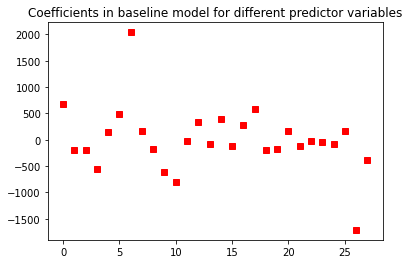

In [21]:
baseline_coef = baseline['model'].coef_
plt.plot(range(len(baseline_coef)), baseline_coef, 'rs')
plt.title('Coefficients in baseline model for different predictor variables')
plt.plot()

## ElasticNet

In [22]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(
    selection='random',
    max_iter=5000,
    precompute=True
)

elastic_net = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", elastic_model)
    ])

In [ ]:
folds = 10
n = 20
l1_ratio = np.linspace(0.05, 1, n)
size = X_train.shape[0] // folds
mse_vals_elastic = np.zeros(n)

for i, l1 in enumerate(l1_ratio):
    mse = 0
    for k in range(5, folds):
        elastic_net["model"].l1_ratio = l1
        training_data = X_train[: k*size]
        training_label = y_train[: k*size]
        validation_data = X_train[k*size:(k+1)*size]
        validation_label = y_train[k*size:(k+1)*size]
        elastic_net.fit(training_data, training_label)
        validation_predict = elastic_net.predict(validation_data)
        mse += mean_absolute_error(validation_label, validation_predict)
    mse_vals_elastic[i] = mse / (folds - 5)

In [24]:
elastic_net['model'].l1_ratio = l1_ratio[np.argmin(mse_vals_elastic)]
elastic_net.fit(X_train, y_train)
print(f"R-squared value on training data: {elastic_net.score(X_train, y_train):0.4f}")
print(f"R-squared value on validation data: {elastic_net.score(X_val, y_val):0.4f}")

R-squared value on training data: 0.8555
R-squared value on validation data: 0.1334


[]

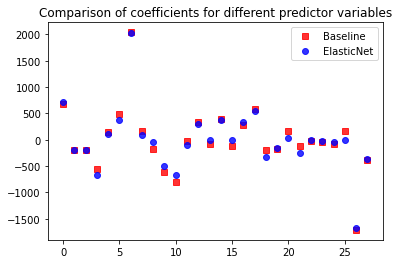

In [25]:
elastic_coef = elastic_net['model'].coef_
plt.plot(range(len(baseline_coef)), baseline_coef, 'rs', label="Baseline", alpha=0.8)
plt.plot(range(len(elastic_coef)), elastic_coef, 'bo', label="ElasticNet", alpha=0.8)
plt.title('Comparison of coefficients for different predictor variables')
plt.legend()
plt.plot()

As we can see from the plot, the values of coefficients haven't changed much after regularization.

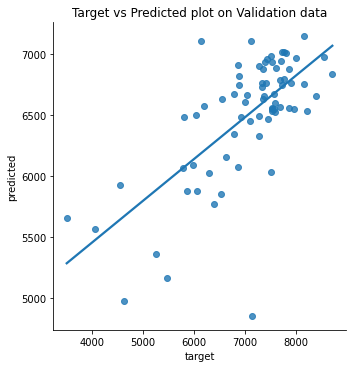

In [26]:
y_pred = elastic_net.predict(X_val)
prediction = pd.DataFrame({"target": y_val, "predicted": y_pred})
sns.lmplot(x='target', y='predicted', data=prediction, ci=None)
plt.title('Target vs Predicted plot on Validation data')
plt.show()

The model performs relatively well on days with a high-demand. But when there is a decline in bike-rental demand, the model performs poorly on those days. In the exploratory data analysis part, we've seen that the bike-rental demand over the years is non-linear. So, a model that can capture non-linearity in the predicted values will be more suitable for this job.

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = baseline.predict(X_val)
print(f"MSE for baseline model: {mean_squared_error(y_val, y_pred)}")
print(f"MAE for baseline model: {mean_absolute_error(y_val, y_pred)}")

y_pred = elastic_net.predict(X_val)
print(f"MSE for elastic net model: {mean_squared_error(y_val, y_pred)}")
print(f"MAE for elastic net model: {mean_absolute_error(y_val, y_pred)}")

MSE for baseline model: 813352.6765081566
MAE for baseline model: 751.4420186483051
MSE for elastic net model: 862346.6714647041
MAE for elastic net model: 780.267201004408


The error metrics has gotten worse for the regularized models. So, we should try non-linear models to improve the performance.

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree_regressor = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", tree)
    ])

folds = 10
n = 20
max_depths = np.arange(5, 15)
size = X_train.shape[0] // folds
mse_vals = np.zeros((len(max_depths)))

for i, depth in enumerate(max_depths):
    mse = 0
    for k in range(5, folds):
        tree_regressor["model"].max_depth = depth
        training_data = X_train[: k*size]
        training_label = y_train[: k*size]
        validation_data = X_train[k*size:(k+1)*size]
        validation_label = y_train[k*size:(k+1)*size]
        tree_regressor.fit(training_data, training_label)
        validation_predict = tree_regressor.predict(validation_data)
        mse += mean_squared_error(validation_label, validation_predict)
    mse_vals[i] = mse / (folds - 5)

In [29]:
depth = max_depths[np.argmin(mse_vals)]
print(f"Best Hyperparameters: Max depth = {depth}")
tree_regressor['model'].max_depth = depth

Best Hyperparameters: Max depth = 6


In [30]:
tree_regressor.fit(X_train, y_train)
print(tree_regressor.score(X_train, y_train))
print(tree_regressor.score(X_val, y_val))

0.9154450485377752
-0.7154587279261506


Here, we have a negative $r^2$ value on the validation dataset. Hence, the decision tree model fits the data quite poorly.

## Next

We want to try out the following modeling techniques to improve our model performance:
- Non-linear Regression Model
- Ensemble Methods: Gradient Boosted Decision Trees